# Exploration of iMaterialist(Furniture) Dataset

This notebook is about simple exploration of images in the iMaterialist(Furniture) [Dataset](https://www.kaggle.com/c/imaterialist-challenge-furniture-2018)

About the competition-
<br>
<br>
As shoppers move online, it’d be a dream come true to have products in photos classified automatically. But, automatic product recognition is challenging because for the same product, a picture can be taken in different lighting, angles, backgrounds, and levels of occlusion. Meanwhile different fine-grained categories may look very similar, for example, ball chair vs egg chair for furniture, or dutch oven vs french oven for cookware. Many of today’s general-purpose recognition machines simply can’t perceive such subtle differences between photos, yet these differences could be important for shopping decisions.<br>
Tackling issues like this is why the Conference on Computer Vision and Pattern Recognition (CVPR) has put together a workshop specifically for data scientists focused on fine-grained visual categorization called the FGVC5 workshop. As part of this workshop, CVPR is partnering with Google, Malong Technologies and Wish to challenge the data science community to help push the state of the art in automatic image classification.<br>

In this competition, FGVC5 workshop organizers and Malong Technologies challenge you to develop algorithms that will help with an important step towards automatic product recognition – to accurately assign category labels for furniture and home goods images. Individuals/Teams with top submissions will be invited to present their work live at the FGVC5 workshop.

## 1. Import Libraries

Import the required libraries

In [2]:
from IPython.core.display import HTML #To display the HTML representation of an object.
from IPython.display import Image #To display the image within jupyter notebook
import matplotlib.pyplot as plt #Function for cretating variety of charts and plots
import seaborn as sns #high-level interface for data visualization
import pandas as pd #library for data analysis and manupulation

## 2. Dataset Preparation

The given dataset consists of json objects containings the image url links and its annotations. Lets simplify the dataset and convert it into a flat dataframe. 

In [7]:
# read the dataset 
#train = pd.read_json('../input/train.json')
#test = pd.read_json('../input/test.json')
#val = pd.read_json('../input/validation.json')

train = pd.read_json('train.json') #reading training dataset which is of json format
test = pd.read_json('test.json') #reading test dataset 
val = pd.read_json('validation.json') #reading validation dataset

# function for creating a column named image_id and label_id by extracting the image and label ids from annotation column

def format_dataset(df):
    df['image_id'] = df.annotations.map(lambda x: x['image_id'])
    df['label_id'] = df.annotations.map(lambda x: x['label_id'])
    df['url'] = df.images.map(lambda x: x['url'][0])
    df.drop(columns=['annotations', 'images'], inplace=True)

format_dataset(train)
format_dataset(val)

# view the dataset snapshot
train.head(10)

,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...
5,6,5,https://img.alicdn.com/imgextra/TB1HoBuHFXXXXX...
6,7,5,http://image.it168.com/n/640x480/6/6016/601653...
7,8,5,http://m.360buyimg.com/n12/jfs/t2161/78/174772...
8,9,5,http://dimg.cnlist.org/image/upload/68/3f/c1/9...
9,10,5,http://bpic.588ku.com/element_pic/17/11/10/75e...


## 3. What is the distribution of labels in the Train Dataset

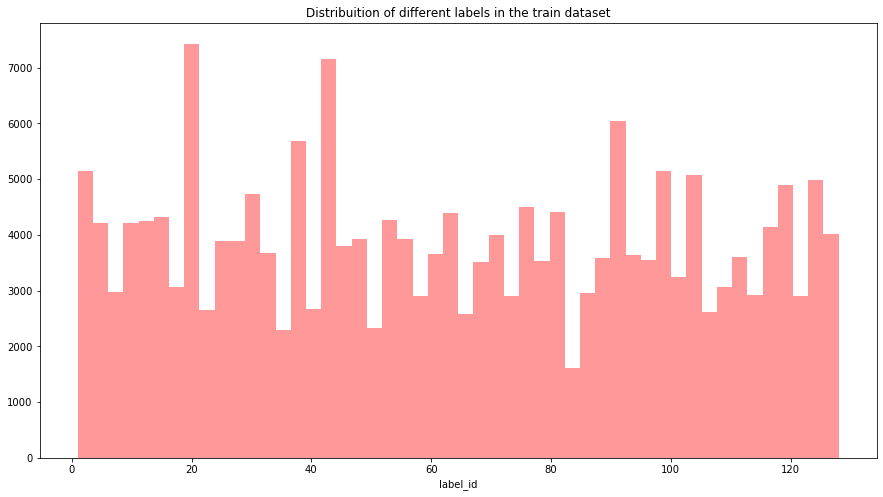

In [8]:
#plotting a distribution plot from seaborn library to see the distribution of the label id
plt.figure(figsize = (15, 8))
plt.title('Distribuition of different labels in the train dataset')
sns.distplot(train['label_id'], color="red", kde=False);

## 4. Top 20 Labels of the dataset 

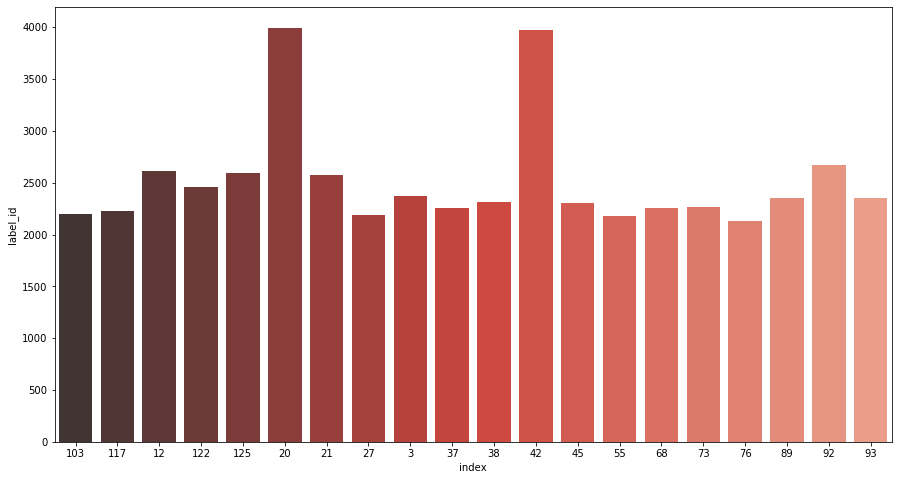

In [9]:
label_df = train.label_id.value_counts().reset_index() #count the number of occurrences of each label in a dataset 
label_df['index'] = label_df['index'].astype(str) #converting the index column into string type

#plotting the first 20 elements as a bar plot with index as x axis and label id as y axis
plt.figure(figsize=(15,8));
sns.barplot(x=label_df['index'][:20], y=label_df['label_id'][:20], palette="Reds_d"); 

> - Label 20 and Label 42 are the most frequent labels present in the dataset

## 5. Images corresponding to each label 

In [10]:
# function to create images 
def display_urls(url_list, label, vals):
    #defining the width, height and margin of the images
    img_style = "width: 180px; height:180px; margin: 0px; float: left; border: 1px solid #222;"  
    #The list of HTML tags is joined into a single string using the join method.
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in url_list.iteritems()])
    html = "<h3>Images related to Label: " + str(label) + " (Total Images: " + str(vals) + ")</h3><br>" + images_list + "<br><br><br>"
    display(HTML(html)) #displaying HTML string 

#looping through label_df and retriving thr top 4 URLs with each label in the train dataframe
val_list = list(label_df['label_id'])
for i, label in enumerate(label_df['index']):    
    url_list = train[train['label_id'] == int(label)].url.head(4) #if the label id in train column matches the index of labrl df then the value is stored in the variable url_list
    display_urls(url_list, label, val_list[i]) #displaying the images with their labels
    if i == 10:
        break

## 6. Probable Objects predicted from object detection

I used an ensemble of pre-trained ImageNet and TensorFlow Object Detection API models to detect the objects present in the images. More details are given in my [iMaterialist Fashion Kernel](https://www.kaggle.com/shivamb/imaterialist-fashion-eda-object-detection-colors).

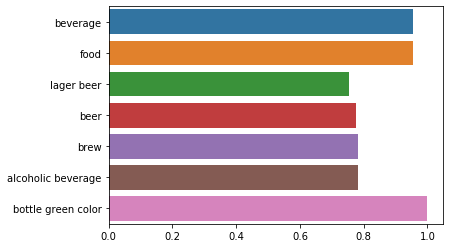

In [11]:
# results variable is a dictionary that contains information about different images. 
#The keys of the dictionary are integers that represent the indices of the labels in label_df. 
#Each value in the dictionary is itself a dictionary that contains information about a particular image.
results = {'12': {'url': u'https://img11.360buyimg.com/imgzone/jfs/t5119/73/1946159194/182429/9e2c2f9e/591674d9N548522ca.jpg', 'index': [u'table lamp', u'lamp', u'furniture', u'source of illumination', u'light brown color'], 'values': [0.909, 0.957, 0.957, 0.799, 0.846]}, '20': {'url': u'https://img14.360buyimg.com/imgzone/jfs/t2320/137/487468866/439466/bb0f64ce/561208eaNe5fce09d.jpg', 'index': [u'beverage', u'food', u'lager beer', u'beer', u'brew', u'alcoholic beverage', u'bottle green color'], 'values': [0.954, 0.954, 0.755, 0.776, 0.781, 0.783, 1]}, '21': {'url': u'http://wx4.sinaimg.cn/mw690/006boOKDgy1fjggzqwijlj30j60j640w.jpg', 'index': [u'sectional furniture', u'furniture', u'indoors', u'sage green color'], 'values': [0.888, 0.97, 0.783, 0.92]}, '38': {'url': u'https://www.uooyoo.com/img2017/9/26/2017092663144657.jpg', 'index': [u'fabric', u'sage green color'], 'values': [0.819, 0.902]}, '42': {'url': u'http://k.zol-img.com.cn/diybbs/6080/a6079920.jpg', 'index': [u'desk', u'table', u'furniture', u'computer', u'microscope', u'sage green color'], 'values': [0.914, 0.914, 0.914, 0.799, 0.789, 0.915]}, '3': {'url': u'https://img.alicdn.com/imgextra/TB2T9B3Xg1J.eBjy0FaXXaXeVXa_!!1945434197.jpg', 'index': [u'arm', u'support', u'armchair', u'chair', u'seat', u'furniture', u'coal black color'], 'values': [0.867, 0.921, 0.759, 0.847, 0.854, 0.854, 0.929]}, '122': {'url': u'https://static1.paizi.com/uploadfile/2017/1013/20171013053252466.jpg', 'index': [u'gray color'], 'values': [0.761]}, '89': {'url': u'https://img14.360buyimg.com/imgzone/jfs/t175/247/2029997415/239022/6e87243d/53c0fa8eN843d8932.jpg', 'index': [u'crown jewels', u'holding device', u'headdress', u'alabaster color', u'ivory color'], 'values': [0.812, 0.786, 0.801, 0.934, 0.814]}, '125': {'url': u'https://img13.360buyimg.com/imgzone/jfs/t3439/263/728869669/71540/eca6cade/5811bb8aN791655b1.jpg', 'index': [u'cup', u'drinking vessel', u'coal black color'], 'values': [0.864, 0.809, 0.953]}, '93': {'url': u'http://www.bvh.cc/images/200912/goods_img/547_P_1260577161314.jpg', 'index': [u'floor lamp', u'lamp', u'furniture'], 'values': [0.992, 0.994, 0.994]}, '92': {'url': u'https://img.alicdn.com/imgextra/TB2VGxwd3vD8KJjy0FlXXagBFXa_!!2529740865.jpg', 'index': [u'percale (fabric)', u'fabric', u'claret red color'], 'values': [0.8, 0.8, 0.942]}}

l = label_df['index'] #saving the index of the label_df as l
x = l[0] #taking x as the first element in l
y = results[x] #x is assigned to the values in result
#since results is the dictionary containing the results of some processing, 
#where each key is a label and each value is a dictionary with information about the label (including its index), this code is selecting the information about the first label in label_df

display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']); #display the index and values as barplot

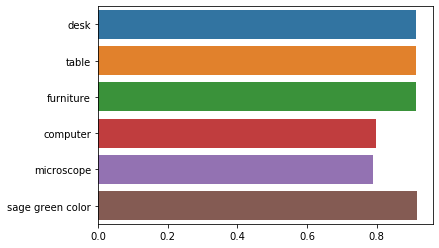

In [12]:
x = l[1] #taking x as the second element in l
y = results[x] #x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

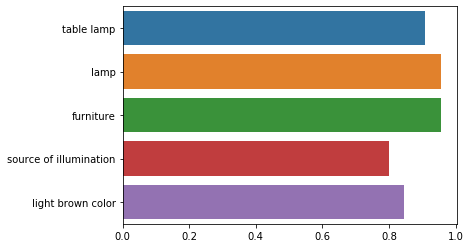

In [13]:
x = l[3] #taking x as the fourth element in l
y = results[x] #x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

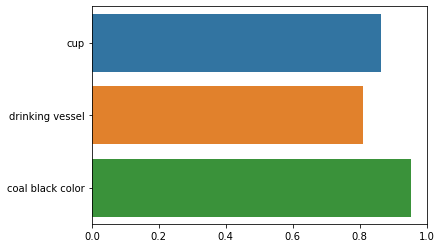

In [14]:
x = l[4] #taking x as the fifth element in l
y = results[x] #x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

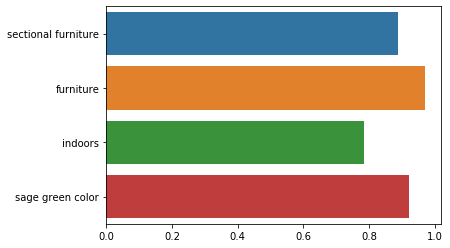

In [15]:
x = l[5] #taking x as the sixth element in l
y = results[x] #x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

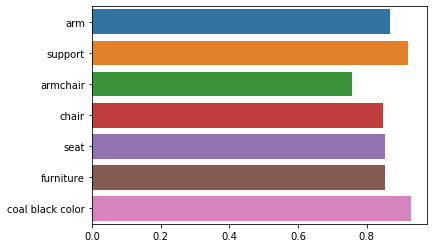

In [16]:
x = l[7] #taking x as the eighth element in l
y = results[x] #x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

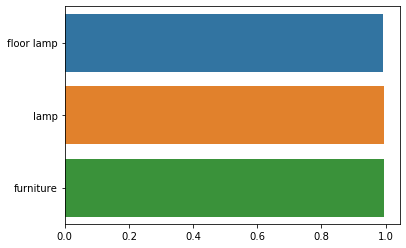

In [17]:
x = l[9] #taking x as the tenth element in l
y = results[x]#x is assigned to the values in result
display(HTML("<div style='margin-left:100px'><h3>Label: "+x+"</h3><br><img src='"+y['url']+"' width=200 height=200></div>"))#displaying the image with label
sns.barplot(y=y['index'], x=y['values']);#display the index and values as barplot

Thanks for viewing the notebook.